# Import modules and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('homework_data_set.csv', index_col=[0])

# EDA

### Basic Information

In [3]:
data.head()

,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77891 entries, 0 to 77890
Data columns (total 9 columns):
advertiser_id             77891 non-null int64
assigned                  77891 non-null int64
date_assignment_starts    77891 non-null object
date_assignment_ends      77891 non-null object
first_revenue_date        8433 non-null object
date_created              77891 non-null object
age                       77891 non-null int64
assign_days               77891 non-null int64
revenue                   3340 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 5.9+ MB


In [5]:
data.describe()

,advertiser_id,assigned,age,assign_days,revenue
count,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03
mean,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07
std,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08
min,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04
25%,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06
50%,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07
75%,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07
max,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09


In [6]:
# drop advertiser_id because it is not meaningful in this anlysis
data.drop('advertiser_id', axis=1, inplace=True)

In [7]:
# check missing values
data.isna().sum()/len(data)*100

assigned                   0.000000
date_assignment_starts     0.000000
date_assignment_ends       0.000000
first_revenue_date        89.173332
date_created               0.000000
age                        0.000000
assign_days                0.000000
revenue                   95.711956
dtype: float64

#### There are two columns having missing values, but they are not problems because a missing value in these variables means that revenue did not occur. So, we could consider them as 'nothing' or '0'.

### Plots for contiunous variables

0    40812
1    37079
Name: assigned, dtype: int64

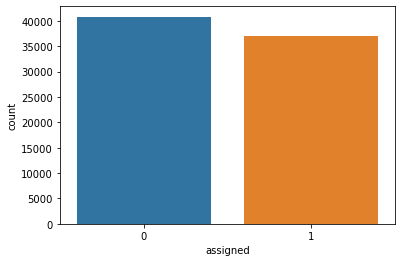

In [8]:
# Population between two groups
sns.countplot(data['assigned'])
data['assigned'].value_counts()

In [9]:
# Average revenue between two groups
data.groupby('assigned').mean()['revenue']

assigned
0    2.388942e+07
1    7.673686e+07
Name: revenue, dtype: float64

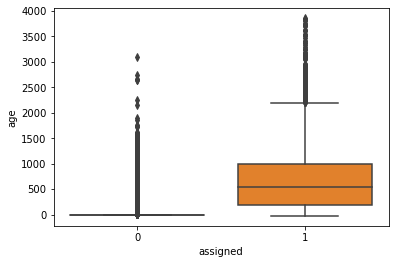

In [10]:
# Age
sns.boxplot(x='assigned', y='age', data=data)

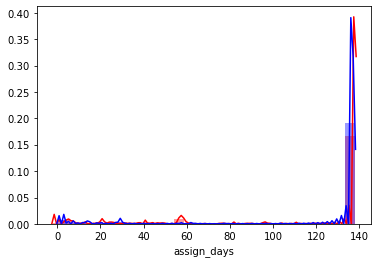

In [11]:
# Assign_days
sns.distplot(data[data['assigned']==1]['assign_days'], bins=30, color='red')
sns.distplot(data[data['assigned']==0]['assign_days'], bins=30, color='blue')

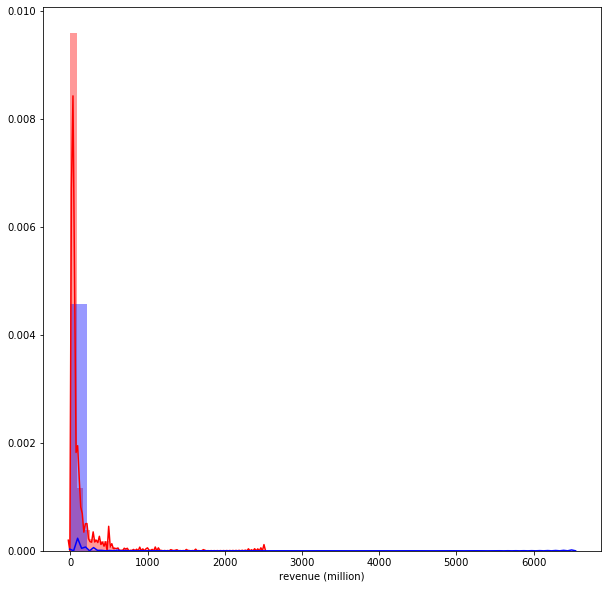

In [12]:
# Revenue
plt.figure(figsize=(10,10))
sns.distplot(data[data['assigned']==1]['revenue'].dropna()/1000000, bins=30, axlabel='revenue (million)', color='red')
sns.distplot(data[data['assigned']==0]['revenue'].dropna()/1000000, bins=30, axlabel='revenue (million)', color='blue')

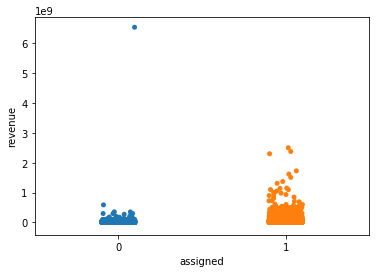

In [13]:
# Revenue
sns.stripplot(x='assigned', y='revenue', data=data, jitter=True)

#### There is one outlier in the unassigned group. I will drop this observation because it will skew a prediction.

In [14]:
# Find the outlier
data['revenue'].idxmax()

75791

In [15]:
# Drop the outlier
data.drop(75791, inplace=True)

# Feature Engineering

### Time variables

##### In the beginning, my plan was to calculate a gap between 'first_revenue_date' and 'date_created' to define 'time_to_first_sale', and then I made bins to keep NaN values as a categorical value(Total 7 bins). However, after conducting modeling, I changed my plan because the result shows a little bit of complex interpretation and high p-values due to dummy variables. Therefore, I got rid of the below part.

In [ ]:
# # Calculate the gap between 'first_revenue_date' and 'date_created'
# data['time_to_first_sale'] = data['first_revenue_date'] - data['date_created']
# data['time_to_first_sale'] = data['time_to_first_sale'].dt.days

# sns.distplot(data['time_to_first_sale'].dropna(), bins=30)

# # Make bins for time_to_first_sale: This variable has a lot of missing values but I cannot impute it because it doesn't make sense. 
# # In this case, I think that missing value is also meaningful, so I'll keep it as a categorical value through binning

# # Convert NaN to string
# data['time_to_first_sale'] = data['time_to_first_sale'].fillna('Missing')

# # Binning function
# def binning(x):
#     a = x.copy()
#     b = x.copy()
#     c = x[x != 'Missing']
    
#     b = b.apply(lambda y: str(y) if y == 'Missing' else y)
    
#     bins = [0,100,200,300,400,500,1000000]
#     labels=['0','100','200','300','400','500']
    
    
#     c = pd.cut(c, bins=bins, labels=labels, include_lowest=True).astype(str)
        
#     a.update(b)
#     a.update(c)
#     a
#     return a

# data['time_to_first_sale'] = binning(data['time_to_first_sale'])

# # Get dummy for time_to_first_sale
# data = pd.get_dummies(data, columns = ['time_to_first_sale'], drop_first=True)

In [16]:
# Convert data type from object to datetime
time_var = ['date_assignment_starts', 'date_assignment_ends','first_revenue_date','date_created']
for var in time_var:
    data[var] = pd.to_datetime(data[var], format='%Y-%m-%d')

##### Instead of binning 'time_to_first_sale', I will make a new feature, 'previous sales', by using 'first_revenue_date'. That is, if there is a value in 'first_revenue_data', the 'previous_sales' column is 1, if not, it is 0. However, if 'first_revenue_date' is later than 'date_assignment_starts', the 'previous_sales' column should be 0.

In [17]:
data['previous_sales'] = data['first_revenue_date'].apply(lambda x: 0 if str(x) is 'NaT' else 1)

In [18]:
late_sales =  (data['date_assignment_starts'] < data['first_revenue_date']) & (data['date_assignment_ends'] > data['first_revenue_date'])
data['late_sales'] = late_sales.astype(int)

In [19]:
data['previous_sales'] = data['previous_sales'] - data['late_sales']

In [20]:
# Drop unnecessary date variables because 'assign_days' is calculated from 'date_assignment_starts' and 'date_assignment_ends', 
# and also  'previous_sales' is derived from 'first_revenue_date' and'late_sales'.
data.drop(['date_assignment_starts', 'date_assignment_ends','first_revenue_date','late_sales'], axis=1, inplace=True)

In [21]:
# Convert datetime to unix timestamp for modeling
data['date_created'] = data['date_created'].apply(lambda x: x.timestamp()) / (24*60*60) # To make it daily base data

### Revenue

In [22]:
# Create a new column to check whether there is revenue or not(true or false)

data['revenue_tf'] = data['revenue'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
# Convert NaN to 0 because it is actually zero.

data['revenue']= data['revenue'].fillna(0)

### Correlation

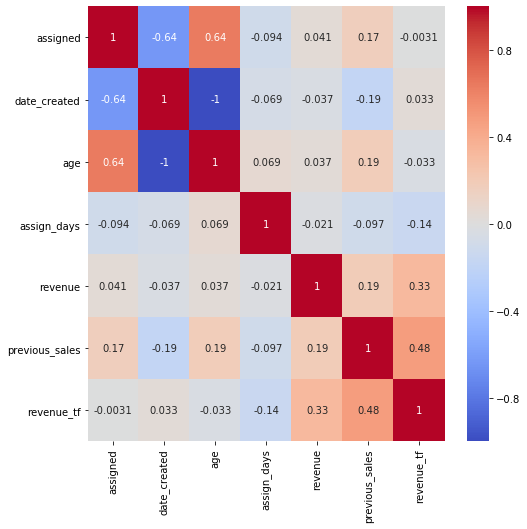

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap='coolwarm',annot=True)

#### As you can see, date_created and age have a 100% negative correlation. It is not helpful for modeling, so I will drop age because the age column has unreasonable value.

In [25]:
# Drop age
data.drop('age', axis=1, inplace=True)

### Final Dataset

In [26]:
data.head()

,assigned,date_created,assign_days,revenue,previous_sales,revenue_tf
0,1,13343.0,138,0.0,0,0
1,1,13362.0,138,0.0,0,0
2,1,13377.0,86,0.0,0,0
3,1,13403.0,138,0.0,0,0
4,1,13454.0,138,0.0,0,0


# Modeling

#### I think that there are two possibilities for this question: <br> A) sales intervention increases the number of leads spending <br>  B) sales intervention increases the amount of each spending. <br>  At first, I will check the A) possibility

In [27]:
# Check the differenc of 'revenue_df' by 'assigned' value
data.groupby('assigned').mean()['revenue_tf']

assigned
0    0.043469
1    0.042207
Name: revenue_tf, dtype: float64

#### Everyone might expect that sales intervention increases the number of leads spending. However,  as you can see, 'assigned == 1' shows a lower probability of 'revenue_tf', unlike our expectation. To investigate this, I'll conduct logistic regression.

## Modeling 1 - Logistic Regression

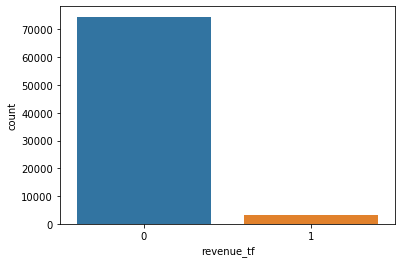

In [28]:
sns.countplot(data['revenue_tf'])

#### It is clearly imbalanced dataset. To deal with it, I will conduct oversampling method.

### Train and Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(['revenue','revenue_tf'],axis=1)
y = data['revenue_tf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1014)
X_columns = X_train.columns

### Oversampling - SMOTE

In [30]:
from imblearn.over_sampling import SMOTENC
categorical_features = [0,3]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=1014, sampling_strategy=.6)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

C:\Users\Sihyun Kwon\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


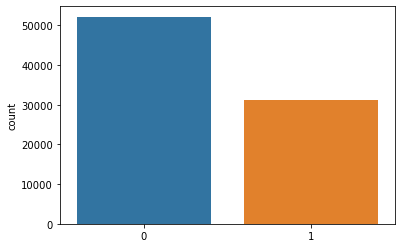

In [31]:
sns.countplot(y_train)

In [32]:
X_train = pd.DataFrame(X_train, columns=X_columns)

### Implementing the model

In [33]:
import statsmodels.api as sm
logit = sm.Logit(y_train,X_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.387445
         Iterations 7


In [34]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                83504
Model:                          Logit   Df Residuals:                    83500
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Jan 2020   Pseudo R-squ.:                  0.4143
Time:                        17:38:38   Log-Likelihood:                -32353.
converged:                       True   LL-Null:                       -55243.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
assigned          -0.9378      0.023    -41.601      0.000      -0.982      -0.894
date_created    4.956e-07   1.48e-06      0.335      0.738   -2.41e-06     3.4e-06
assign_days       -0.0118      0.000

#### In this result, p-values are almost zero except for two dummy variables. So, we can trust the coefficient of most variables here.

In [35]:
# odds ratio
np.exp(result.params)

assigned           0.391477
date_created       1.000000
assign_days        0.988244
previous_sales    54.932600
dtype: float64

In [36]:
data.groupby('assigned').mean()

,date_created,assign_days,revenue,previous_sales,revenue_tf
assigned,,,,,
0,17186.851486,124.017936,8.789278e+05,0.037416,0.043469
1,16560.213247,116.594487,3.238846e+06,0.130316,0.042207


#### According to the result, 'assigned' reduces the probability of generating revenue('revenue_tf') by about 61%. On the other hand, only 'previous_sales' shows a positive relationship with a huge odds ratio. (based on p < 0.05)

### Model Evaluation
#### It is actually not an important part of this question. Just to check whether we can trust logistic regression with this data, I will evaluate it with classification report

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

C:\Users\Sihyun Kwon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     22361
           1       0.37      0.71      0.49      1006

    accuracy                           0.94     23367
   macro avg       0.68      0.83      0.73     23367
weighted avg       0.96      0.94      0.95     23367



#### Although accuracy is 0.94, I am not sure whether it is good because this has an imbalanced dataset. However, recall of 1 is 0.71 while the precision of it is 0.37. So I would say that this model is not bad at least because recall is more important in this case. If the purpose is the accurate prediction, I will use boosting models, not logistic regression.

#### As a next step, I will conduct a linear regression to check whether 'assigned' makes the revenue large

# Modeling 2 - Linear Regression with obervations having revenue

#### In this step, I will check how much 'assigned' increase the revenue only among observations having revenue. That is, we already checked how much 'assigned' increases the probability of spending(sales) in the logistic regression model, and now, we will predict the amount of revenue increase related when it makes sales. I will deal with all of the data to check the overall effect later.

In [39]:
new_data = data[data['revenue_tf']==1]

### Train and Test Split

In [40]:
X = new_data.drop(['revenue','revenue_tf'],axis=1)
y = new_data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1014)
X_columns = X_train.columns

### Implementing the model

In [41]:
reg = sm.OLS(y_train,X_train)
result = reg.fit()

In [42]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.156
Model:                            OLS   Adj. R-squared (uncentered):              0.155
Method:                 Least Squares   F-statistic:                              108.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):                    1.63e-84
Time:                        17:50:32   Log-Likelihood:                         -46947.
No. Observations:                2337   AIC:                                  9.390e+04
Df Residuals:                    2333   BIC:                                  9.393e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### At first, adjusted R-squared is 0.15 which means a weak model, but we can still use coefficient values for inference if the p-value is low enough. The ordinary standard of the p-value is 0.05, and the p-value of 'assigned' is 0.000. So, I could say that this is strong evidence.

#### If the lead is assigned, the average revenue increases by 49,350,000. Therefore, I would say that sales intervention contributes to increasing revenue. The 'previous_sales' feature is also important. In the case of leads having previous sales records, the revenue is higher by 19,030,000. 

In [43]:
data.groupby('assigned').mean()

,date_created,assign_days,revenue,previous_sales,revenue_tf
assigned,,,,,
0,17186.851486,124.017936,8.789278e+05,0.037416,0.043469
1,16560.213247,116.594487,3.238846e+06,0.130316,0.042207


#### As you can see, the previous_sales is 0.13 in the assigned group while it is 0.037 in the unassigned group. Considering all of the facts, I think that the 'assigned' feature is the main factor for the difference of the revenue between two groups, and the 'previous_sales' feature is a second important one.

# Modeling 3 - Linear Regression with all data

#### In this step, I will put all the data. That is, this modeling will include the results from modeling 1 as well as modeling 2. By doing so, we will define how much the 'assigned' variable contributes to the revenue totally, and which feature is more important related to the revenue.

In [44]:
X = data.drop(['revenue','revenue_tf'],axis=1)
y = data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1014)
X_columns = X_train.columns

In [45]:
reg = sm.OLS(y_train,X_train)
result = reg.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              579.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:51:31   Log-Likelihood:                     -1.0128e+06
No. Observations:               54523   AIC:                                  2.026e+06
Df Residuals:                   54519   BIC:                                  2.026e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Based on P < 0.05, 'assigned' and 'previous_sales' are meaningful features here, but among them, the coefficient of 'previous_sales', 19,800,000, outweighs that of 'assigned', 547,900. Therefore, I could say the 'previous_sales' variable is more important for higher revenue, although sales intervention somewhat contributes to the revenue.